# K-Means Clustering

##### Author information
- Name: Eunbi Cho
- email address: 22000724@handong.ac.kr
- GitHub: eunbijoel

### Part 1. Background of K-MEANS


- The situation before the methodology was introduced:\
  Before the introduction of the k-means clustering methodology, data analysis primarily relied on manual and subjective methods for grouping similar data points together. These methods often lacked a systematic and objective approach, making it challenging to identify meaningful patterns and structures within the data.\
  The term "k-means" was first used by James MacQueen in 1967, though the idea goes back to Hugo Steinhaus in 1956. The standard algorithm was first proposed by Stuart Lloyd of Bell Labs in 1957 as a technique for pulse-code modulation.

- Methodology introduction and application:\
  K-Means clustering is the most popular unsupervised learning algorithm, used to find intrinsic groups within the unlabelled dataset and draw inferences from them. It aims to minimize the within-cluster sum of squares, also known as the "inertia," by iteratively optimizing the cluster assignments and updating the cluster centroids.\
   The k-means algorithm was introduced to overcome the limitations of manual clustering techniques and to provide a more efficient and scalable solution for clustering large datasets. It addressed the need for a more objective and quantitative method for data analysis, especially in cases where the underlying structure or patterns were not known in advance. The introduction of the k-means algorithm revolutionized the field of clustering by providing a systematic and automated approach to grouping data points into clusters. 
  
  

  **Applications**:
  - Customer segmentation
  - Image segmentation
  - Species clustering
  - Anomaly detection
  - Clustering languages
  - etc.

### Part 2. Key concept of K-MEANS



 - **Key concept**:

  The k-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset. 
The k-means clustering algorithm works primarily on minimizing the intra-cluster variance or the squared error function:

  $\mathbf{J} = \sum_{j=1}^k\sum_{i=1}^n ||Xi^j-C_j||^2$ where,\
  - $J$ is the objective function value
  - $k$ is the number of clusters
  - $n$ is the number of cases
  - $Xi$ is the case i
  - $C_j$ is the centroid of cluster
  - $||...||^2$ is the squared Euclidean distance between a data point and its centroid
  
- **Steps of operation**:
  1. Specify the number of clusters (i.e., K)
  2. Initialize centroid points by randomly choosing K instances
  3. Label each data point to its closest centroid point using a distance metric
  4. Recalculate centroid points by taking the average of all points in a cluster 
  5. Repeat steps(3 to 4) until the algorithm meets a user-defined criterion

- **Main strength of K-Means**:

  *  *Simplicity*: The k-means algorithm is relatively easy to understand and implement. It has a straightforward concept of assigning data points to clusters based on the nearest centroid and updating the centroids iteratively. The simplicity of the algorithm makes it accessible to a wide range of users, including those without extensive machine learning expertise.
  *  *Scalability*: K-means is computationally efficient and can handle large datasets with a large number of data points. Its time complexity is typically linear with the number of data points and the number of clusters. This scalability makes it suitable for analyzing and clustering large datasets.
  * *Interpretability*: The resulting clusters in k-means are relatively easy to interpret. Each cluster represents a group of similar data points, and the centroid of the cluster provides a representative point for that group. This interpretability can be valuable in gaining insights and understanding patterns within the data.
  *  *Versatility*: K-means can handle a variety of data types, including numerical and continuous variables. It is also compatible with distance-based similarity measures, making it applicable to a wide range of applications and domains.
  *  *Initial centroid flexibility*: K-means allows flexibility in initializing the initial centroids. While random initialization is commonly used, alternative strategies such as k-means++ can be employed to enhance the convergence speed and the quality of the final clustering result.

### Part 3. Example

* PSUDO CODE of KMEANS function
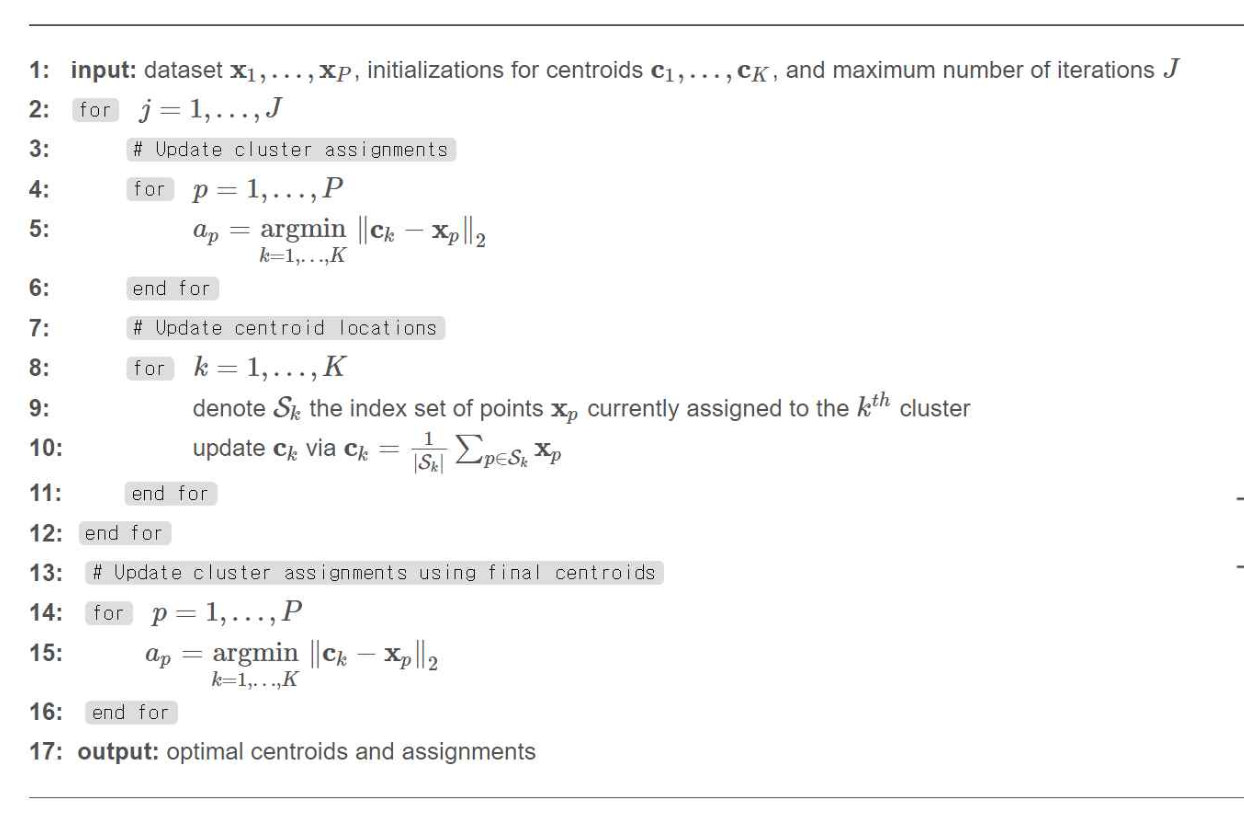

Using a simple customer data, a sample code for running the K-Means is presented with results and interpretation.

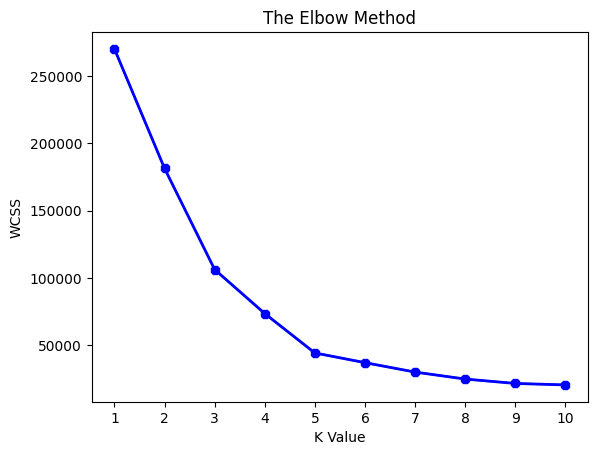

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


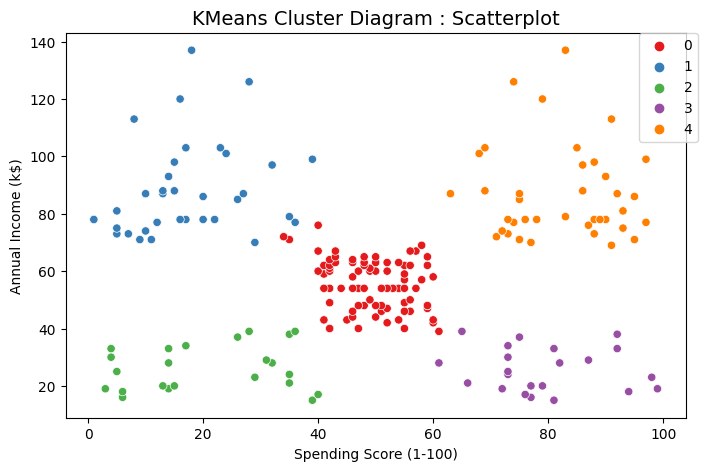

In [8]:
#Import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns  
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans


#Load data
toy_data = pd.read_csv('Mall_Customers.csv')
'''
CustomerID- Unique ID assigned to the customer
Gender- Gender of a customer
Age- Age of the customer
Annual Income (k$)- Annual income of a customer in k$
Spending Score (1~100)- Score assigned by the mall based on customer behavior and spending nature
'''

## Subset dataframe for analysis
X = toy_data[['Annual Income (k$)', 'Spending Score (1-100)']].copy()

## Scale the features
scaler = StandardScaler()
X_kmeans =  scaler.fit_transform(X)

#Model Formation
#Using the ELBOW Method on KMEANS++, calculate the optimum cluster number
wcss=[]

#Assuming the max number of cluster would be 10, judge the number of clusters 
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

#Visualizing the ELBOW method to get the optimal value of K 
plt.title('The Elbow Method')
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="blue", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show() #5 minimal drop-> 5 clusters

## Model fitting with 5 clusters, derived from the ELBOW method
clusters = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = clusters.fit_predict(X_kmeans)


# Creating a New Dataframe with an appended cluster column
df_Kmeans = toy_data.copy()           
df_Kmeans['Cluster'] = y_kmeans 

## Visualising clusters on the scatterplot
plt.figure(figsize=(8,5))
plt.title('KMeans Cluster Diagram : Scatterplot', fontsize=14)
sns.scatterplot(data=df_Kmeans, x='Spending Score (1-100)', y='Annual Income (k$)', hue='Cluster', palette="Set1")
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)
plt.show()

### Model Interpretation 
**Result and Meaning**\
Based on the analysis, we have identified five clusters with distinct characteristics:
- Cluster 0 (Red): This cluster represents customers with average earnings and average spending. They neither earn significantly high nor spend extravagantly.
- Cluster 1 (Blue): This cluster represents customers with high earnings but relatively lower spending. They have higher incomes but exhibit more frugal spending behavior.
- Cluster 2 (Green): Customers in this cluster have low earnings and low spending habits. They have limited financial resources and tend to spend less.
- Cluster 3 (Purple): This cluster consists of customers who earn less but tend to spend more. They have lower incomes but exhibit higher spending habits.
- Cluster 4 (Orange): This cluster consists of customers with high earnings and high spending. They have both high incomes and a tendency to spend more, making them a potential target group for marketing efforts.

**How it can be used**\
By identifying these customer segments, businesses can tailor their marketing strategies to better serve each group's specific needs.\
For example:

Cluster 1 (Blue) customers may require incentives or tailored marketing approaches to increase their spending.\
Cluster 2 (Green) customers could be targeted with budget-friendly options or offers to attract their limited spending capacity.\
Cluster 3 (Purple) customers may benefit from promotions or discounts to encourage their spending further.\
Cluster 4 (Orange) customers, being high earners and spenders, might be interested in exclusive or luxury products and experiences.


Understanding customer segments through k-means clustering enables businesses to personalize their marketing campaigns, optimize product offerings, and enhance customer satisfaction, ultimately leading to improved business performance.








## References:

* https://www.kaggle.com/code/prashant111/k-means-clustering-with-python
* https://acadgild.com/blog/k-means-clustering-algorithm/
* https://github.com/ashishpatel26/ML-Notes-in-Markdown/blob/master/03-Clustering/01-K-meansClustering.md#objective-function-for-soft-k-means
* https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a
* https://online.stat.psu.edu/stat508/book/export/html/648
* https://www.saedsayad.com/clustering_kmeans.htm
* https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python
